In [ ]:
# Import libraries we'll need

import numpy as np 
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Get the data**

In [ ]:
df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Understand & clean the data**

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Lihat data unik menurut kolom.  Ada beberapa kolom yang bisa kita konversi ke biner.

In [ ]:
for item in df.columns:
    print(item)
    print (df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

Mari kita ubah string menjadi huruf kecil.

In [ ]:
for item in df.columns:
    try:
        df[item] = df[item].str.lower()
    except:
        print(item, "couldn't convert")
df.head()

SeniorCitizen couldn't convert
tenure couldn't convert
MonthlyCharges couldn't convert


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


Ubah semua yes dan no menjadi 0 & 1 sehingga pengklasifikasi kami dapat menggunakan data ini.

In [ ]:
columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item].replace(to_replace='yes', value=1, inplace=True)
    df[item].replace(to_replace='no',  value=0, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,no phone service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one year,0,mailed check,56.95,1889.5,0
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,no,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

Kita bisa melihat TotalCharges masih berupa objek.  Perbaiki TotalCharges sebagai float...

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

Periksa NULL

In [ ]:
df.isnull().sum(axis = 0)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df = df.fillna(value=0)

Seimbangkan label sehingga kita memiliki jumlah non-churner yang sama dengan churner.

In [ ]:
churners_number = len(df[df['Churn'] == 1])
print("Number of churners", churners_number)

churners = (df[df['Churn'] == 1])

non_churners = df[df['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
df2 = churners.append(non_churners)

Number of churners 1869
Number of non-churners 1869


**Classifier**

Apakah ada korelasi yang kuat?

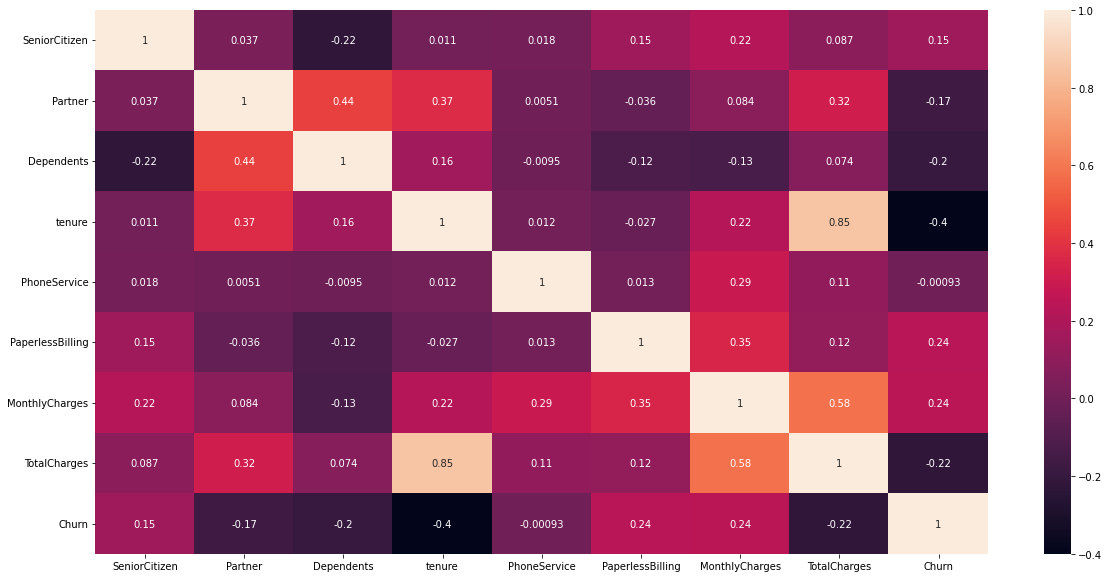

In [ ]:
def show_correlations(dataframe, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(df2,show_chart=True)

Sekarang mari kita buat classifier.

In [ ]:
try:
    customer_id = df2['customerID'] # Store this as customer_id variable
    del df2['customerID'] # Don't need in ML DF
except:
    print("already removed customerID")

In [ ]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
4,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1
5,female,0,0,0,8,1,yes,fiber optic,no,no,yes,no,yes,yes,month-to-month,1,electronic check,99.65,820.50,1
8,female,0,1,0,28,1,yes,fiber optic,no,no,yes,yes,yes,yes,month-to-month,1,electronic check,104.80,3046.05,1
13,male,0,0,0,49,1,yes,fiber optic,no,yes,yes,no,yes,yes,month-to-month,1,bank transfer (automatic),103.70,5036.30,1


In [ ]:
ml_dummies = pd.get_dummies(df2)
ml_dummies.fillna(value=0, inplace=True)
ml_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_female,gender_male,MultipleLines_no,MultipleLines_no phone service,MultipleLines_yes,InternetService_dsl,InternetService_fiber optic,InternetService_no,OnlineSecurity_no,OnlineSecurity_no internet service,OnlineSecurity_yes,OnlineBackup_no,OnlineBackup_no internet service,OnlineBackup_yes,DeviceProtection_no,DeviceProtection_no internet service,DeviceProtection_yes,TechSupport_no,TechSupport_no internet service,TechSupport_yes,StreamingTV_no,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
2,0,0,0,2,1,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0,0,2,1,1,70.70,151.65,1,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
5,0,0,0,8,1,1,99.65,820.50,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
8,0,1,0,28,1,1,104.80,3046.05,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
13,0,0,0,49,1,1,103.70,5036.30,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0


In [ ]:
# Add a random column to the dataframe
ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

In [ ]:
show_correlations(ml_dummies, show_chart=False)["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_month-to-month                    0.481282
OnlineSecurity_no                          0.408688
TechSupport_no                             0.391412
InternetService_fiber optic                0.351758
PaymentMethod_electronic check             0.343983
OnlineBackup_no                            0.299684
DeviceProtection_no                        0.298556
MonthlyCharges                             0.242803
PaperlessBilling                           0.235697
SeniorCitizen                              0.152831
StreamingTV_no                             0.147479
StreamingMovies_no                         0.144811
StreamingMovies_yes                        0.087565
StreamingTV_yes                            0.084859
MultipleLines_yes                          0.055158
gender_female                              0.007491
MultipleLines_no phone service             0.000932
---randomColumn---                        -0.000169
PhoneService

<Figure size 1440x720 with 0 Axes>

In [ ]:
try:
    label = ml_dummies['Churn'] # Remove the label before training the model
    del ml_dummies['Churn']
except:
    print("label already removed.")

KNeighborsClassifier
0.658 
 - - - - -  

DecisionTreeClassifier
0.726 
 - - - - -  



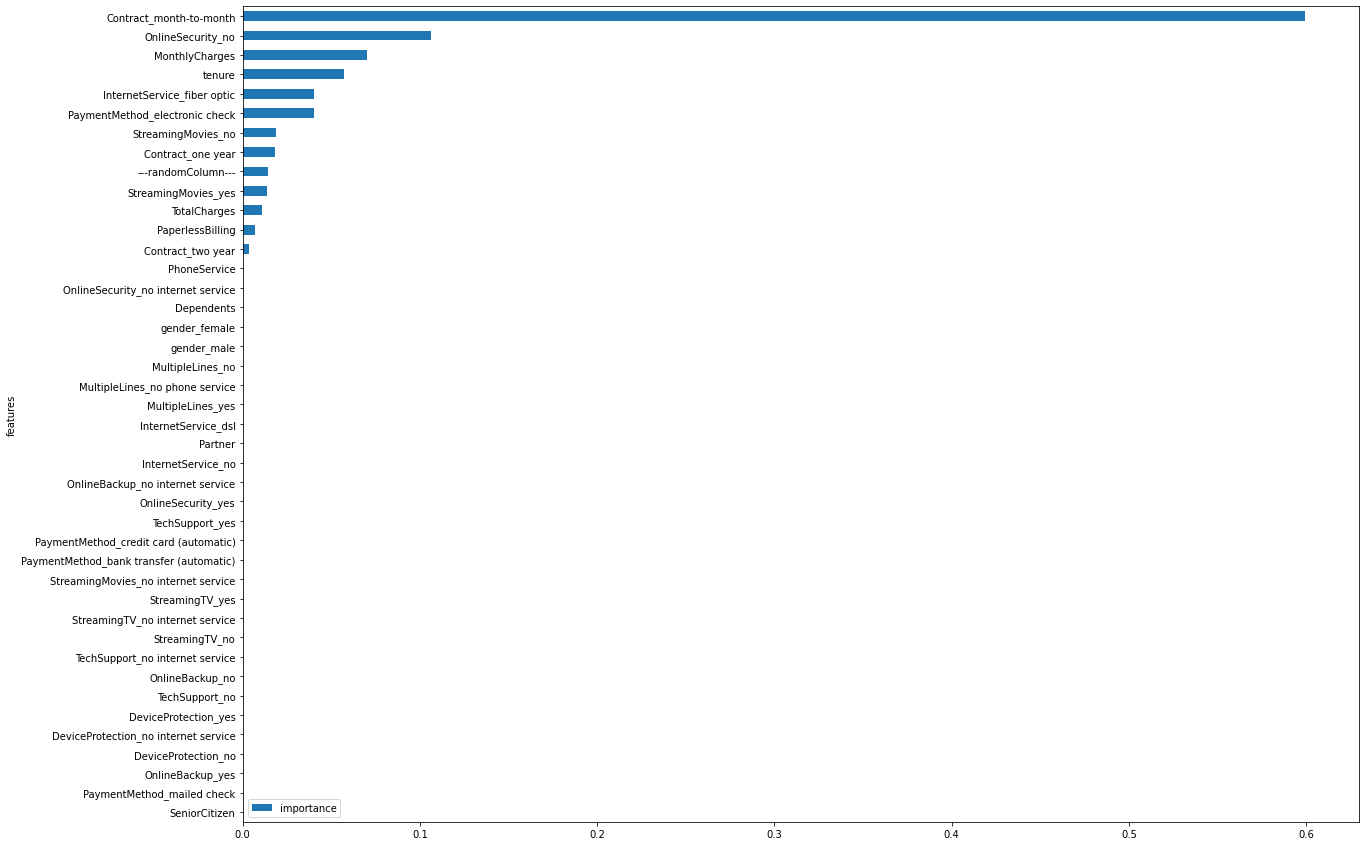

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(ml_dummies, label, test_size=0.3)

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)
]
    

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df = pd.DataFrame()
feature_df['features'] = ml_dummies.columns
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)    
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))

Confusion matrix, without normalization
[[414 152]
 [155 401]]
Normalized confusion matrix
[[0.73 0.27]
 [0.28 0.72]]


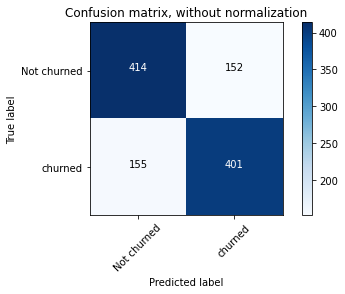

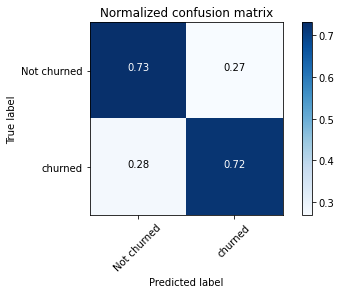

              precision    recall  f1-score   support

 Not churned       0.73      0.73      0.73       566
     churned       0.73      0.72      0.72       556

    accuracy                           0.73      1122
   macro avg       0.73      0.73      0.73      1122
weighted avg       0.73      0.73      0.73      1122



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(label_test, pred, target_names=class_names)
print(eval_metrics)

**Grid Search to tweak parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth_range = range(2,20,2)
leaf_range = range(1,10,2)
n_estimators_range = range(10,200,10)
max_features_range = range(1,len(ml_dummies.columns),5)


param_grid = dict(max_depth = max_depth_range,
                 min_samples_leaf = leaf_range,
                 n_estimators = n_estimators_range,
                 max_features = max_features_range
                )

### Warning, can take some time

# d_tree = RandomForestClassifier()
# grid = GridSearchCV(d_tree, param_grid, cv=5, scoring = 'accuracy', verbose=1, return_train_score=True)
# grid.fit(feature_train, label_train)
# print (grid.best_score_)
# print (grid.best_params_)
# print (grid.best_estimator_)

**Make predictions on the dataset**

In [ ]:
# Preprocessing original dataframe
def preprocess_df(dataframe):
    x = dataframe.copy()
    try:
        customer_id = x['customerID']
        del x['customerID'] # Don't need in ML DF
    except:
        print("already removed customerID")
    ml_dummies = pd.get_dummies(x)
    ml_dummies.fillna(value=0, inplace=True)

    # import random done above
    ml_dummies['---randomColumn---'] = np.random.randint(0,1000, size=len(ml_dummies))

    try:
        label = ml_dummies['Churn']
        del ml_dummies['Churn']
    except:
        print("label already removed.")
    return ml_dummies, customer_id, label

original_df = preprocess_df(df)

In [ ]:
output_df = original_df[0].copy()
output_df['---randomColumn---']
output_df['prediction'] = clf.predict_proba(output_df)[:,1]
output_df['churn'] = original_df[2]
output_df['customerID'] = original_df[1]

In [ ]:
print('Mean predict proba of churn:',round(output_df[output_df['churn'] == 1]['prediction'].mean(),2))
print('Mean predict proba of NON-churn:',round(output_df[output_df['churn'] == 0]['prediction'].mean(),2))

Mean predict proba of churn: 0.69
Mean predict proba of NON-churn: 0.32


Gunakan kerangka data berikutnya ini untuk aktivasi.  Dengan menggunakan media, mari kita targetkan pelanggan yang belum melakukan churn tetapi kemungkinan besar akan melakukannya.

In [ ]:
activate = output_df[output_df['churn'] == 0]
activate[['customerID','churn','prediction']]

,customerID,churn,prediction
0,7590-vhveg,0,0.767442
1,5575-gnvde,0,0.022222
3,7795-cfocw,0,0.150943
6,1452-kiovk,0,0.679654
7,6713-okomc,0,0.241379
...,...,...,...
7037,2569-wgero,0,0.023569
7038,6840-resvb,0,0.280000
7039,2234-xaduh,0,0.000000
7040,4801-jzazl,0,0.241379
